In [2]:
from Util import ModelEvaluator
import numpy as np

In [5]:
# 加载第一个 .npy 文件
file1_path = './data/predictions.npy'
file2_path = './data/targets.npy'

# 提取数据
data1 = np.load(file1_path)
data2 = np.load(file2_path)

# 打印前10个数据
print("File 1 - First 10 entries:")
print(data1[:10])

print("\nFile 2 - First 10 entries:")
print(data2[:10])


File 1 - First 10 entries:
[-1.3447212 -1.2357867 -1.9968134 -2.230981  -2.2621043 -1.9942029
 -1.7624745 -2.093288  -1.7989353 -1.7862697]

File 2 - First 10 entries:
[-1.8107437 -1.7379031 -1.7899321 -1.8107437 -1.7587147 -1.6754683
 -1.4673524 -1.6234393 -1.7170916 -1.5818162]


In [17]:
import os

file_path = 'E:/Dataset/waves/'
def standardize(data):
    """
    对一列数据进行标准化，返回标准化后的数据、均值和标准差。

    参数：
    data: np.ndarray - 输入数据，形状为 (样本数, ) 或 (样本数, 1)。

    返回：
    standardized_data: np.ndarray - 标准化后的数据。
    mean: float - 数据的均值。
    std: float - 数据的标准差。
    """
    # 计算数据的均值和标准差
    mean = np.mean(data)
    std = np.std(data)

    # 对数据进行标准化
    standardized_data = (data - mean) / std

    return standardized_data, mean, std

def standardize_data():
    file_prefix = 'mode'
    file_suffix = '.csv'
    num_modes = 8
    mean_list=[]
    std_list=[]
    for i in range(1, num_modes + 1):
        # 读取数据
        file_path_mode = file_path + f'{file_prefix}{i}{file_suffix}'
        data = pd.read_csv(file_path_mode)
        req_data=data['MWH']
        # 标准化
        standardized_data, mean, std = standardize(req_data)
        # 保存均值和标准差
        mean_list.append(mean),std_list.append(std)
    # 定义保存路径
    save_dir = './data/'  # 保存到 data 目录
    # 将 mean_list 和 std_list 转换为 numpy 数组
    mean_array = np.array(mean_list)
    std_array = np.array(std_list)

    # 保存为 .npy 文件
    np.save(save_dir+'mean.npy', mean_array)
    np.save(save_dir+'std.npy', std_array)
    print("mean 和 std 已保存为 .npy 文件")
standardize_data()


mean 和 std 已保存为 .npy 文件


In [11]:
def inverse_standardize(standardized_data, means, stds):
    """
    反标准化数据。

    参数：
    standardized_data: np.ndarray - 标准化后的数据。
    means: np.ndarray - 每个通道的均值。
    stds: np.ndarray - 每个通道的标准差。

    返回：
    original_data: np.ndarray - 反标准化后的原始数据。
    """
    original_data = (standardized_data * stds) + means
    return original_data

In [18]:
import numpy as np

# 假设你已经加载了 mean 和 std 的 numpy 数组
mean_loaded = np.load('./data/mean.npy')
std_loaded = np.load('./data/std.npy')

# 查看 mean 的形状和内容
print("Mean 的形状：", mean_loaded.shape)
print("Mean 的内容：", mean_loaded)

# 查看 std 的形状和内容
print("Std 的形状：", std_loaded.shape)
print("Std 的内容：", std_loaded)


Mean 的形状： (8,)
Mean 的内容： [ 1.93264390e+00  6.06148333e-10 -1.27216668e-11  1.04545671e-11
  2.11569000e-10  2.07177666e-11 -8.65469999e-11  2.28215234e-11]
Std 的形状： (8,)
Std 的内容： [0.73106665 0.14573481 0.06303799 0.05144888 0.05055763 0.05002146
 0.04983501 0.04857354]


In [21]:
# 定义文件路径
data_dir = './data/'
mean_path = os.path.join(data_dir, 'mean.npy')
std_path = os.path.join(data_dir, 'std.npy')
premode_path = os.path.join(data_dir, 'pre_mode.npy')  # 假设 premode 文件是 premode.npy
save_path = os.path.join(data_dir, 'pre_mode_inverse.npy')

# 加载均值、标准差和 premode 数据
mean = np.load(mean_path)
std = np.load(std_path)
premode = np.load(premode_path)

# 反标准化
premode_inverse = inverse_standardize(premode, mean, std)
# 保存反标准化后的数据
np.save(save_path, premode_inverse)
print(f"反标准化后的数据已保存为 {save_path}")

反标准化后的数据已保存为 ./data/pre_mode_inverse.npy


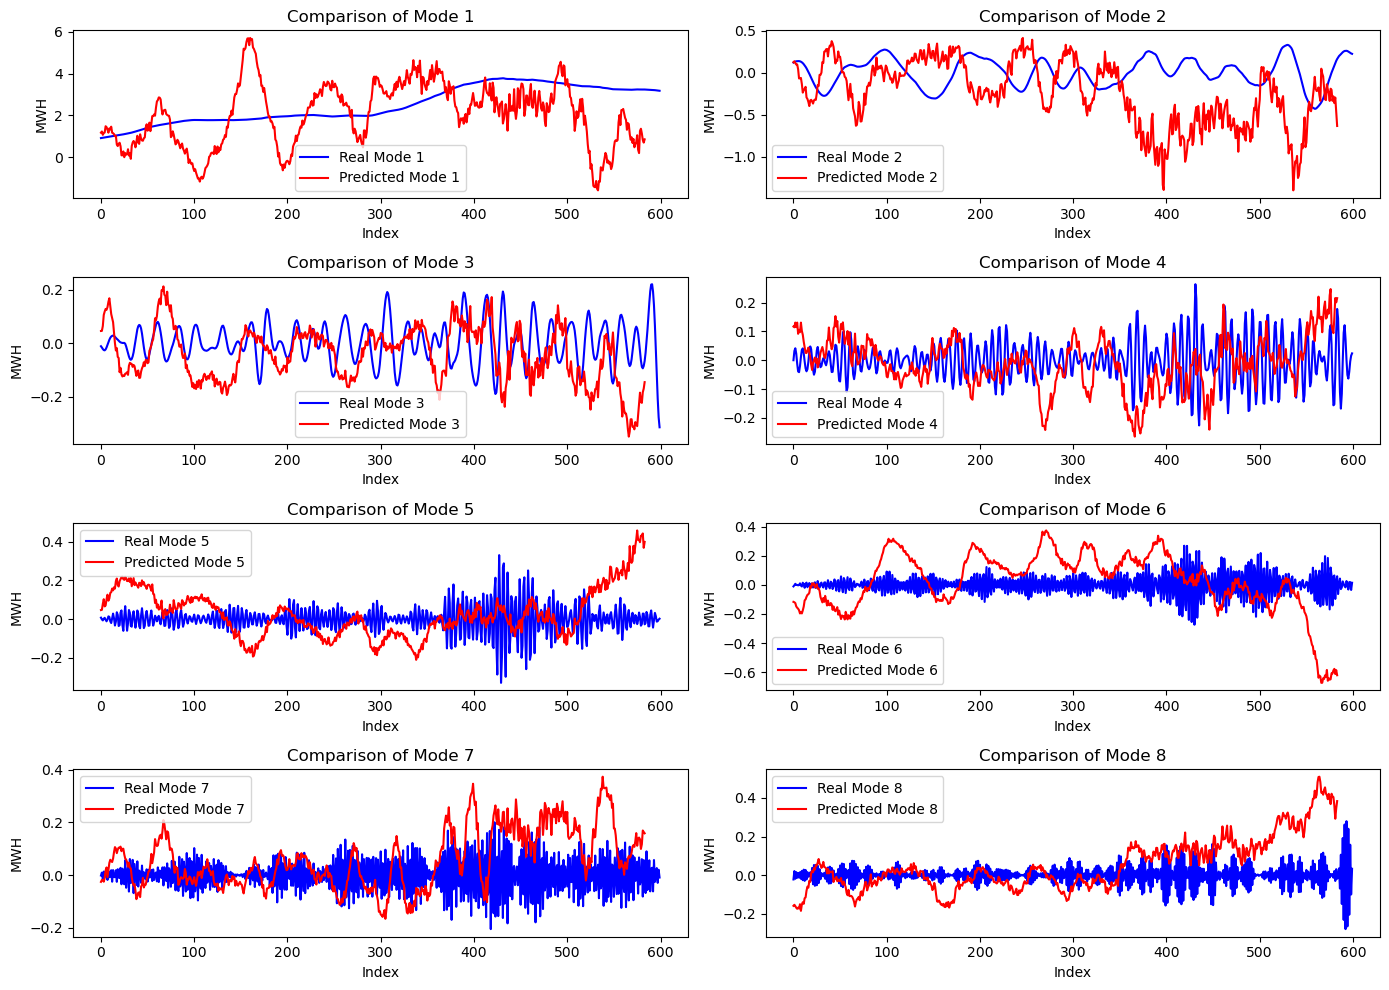

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_modes():
    # 1. 加载真实值 (真实的 MWH 数据，来自 mode1-mode8.csv 文件)
    real_modes = []
    for i in range(1, 9):  # 从 mode1.csv 到 mode8.csv
        file_path ='E:/Dataset/waves/'+ f'mode{i}.csv'  # 构造文件路径
        data = pd.read_csv(file_path)
        mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
        real_modes.append(mwh_data)

    real_modes = np.array(real_modes)  # 将所有模式的数据合并成一个 NumPy 数组 (8, 600)

    # 2. 加载预测值 (来自 pre-mode.npy)
    predicted_modes = np.load('./data/pre_mode_inverse.npy')  # 预测值应该是 shape (600, 8)

    # 3. 画折线图
    plt.figure(figsize=(14, 10))

    for i in range(8):  # 绘制 8 个模态
        plt.subplot(4, 2, i + 1)  # 4 行 2 列的子图，每个模态对应一个子图
        plt.plot(real_modes[i], label=f"Real Mode {i + 1}", color='blue')  # 真实值
        plt.plot(predicted_modes[:, i], label=f"Predicted Mode {i + 1}", color='red')  # 预测值
        plt.xlabel("Index")
        plt.ylabel("MWH")
        plt.title(f"Comparison of Mode {i + 1}")
        plt.legend()

    plt.tight_layout()  # 调整布局
    plt.show()  # 显示图像

# 调用函数
compare_modes()


In [28]:
predication = np.load('./data/predictions.npy')
target = np.load('./data/targets.npy')
print(predication.shape, target.shape)
evaluator = ModelEvaluator(predication, target)
print(evaluator.rmse())
print(evaluator.mae())
print(evaluator.sse())
print(evaluator.mape())
print(evaluator.tic())

(584,) (584,)
1.5733566
1.2417395
1445.6636
255.3652048110962
0.82695013


In [ ]:
|